# DATA TYPES AND FEATURE INGENERING

## CATEGORICAL VARIABLES

## STRAIGHT CODING (DUMMY VARIABLES)

In [6]:
import pandas as pd
data = pd.read_csv('adult1.data', header=None, index_col=False,
       names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [8]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [10]:
print("Features before get dummies:\n",list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Features before get dummies:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Ma

In [11]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
features = data_dummies.ix[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('array shape X:{} array shape y:{}'.format(X.shape, y.shape))

array shape X:(32561, 44) array shape y:(32561,)


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Correctness on the test set: {:.2f}".format(logreg.score(X_test,y_test)))

Correctness on the test set: 0.81


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# NUMBER CAN BE CODED AS A CATEGORY

In [21]:
demo_df = pd.DataFrame({"Numbered feature":[0,1,2,1], "Categorical feature":['socks',
                                                                             'fox','socks','box']})
display(demo_df)

,Numbered feature,Categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [22]:
pd.get_dummies(demo_df)

,Numbered feature,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [23]:
demo_df["Numbered feature"] = demo_df['Numbered feature'].astype(str)
pd.get_dummies(demo_df, columns=['Numbered feature','Categorical feature'])

,Numbered feature_0,Numbered feature_1,Numbered feature_2,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# BINNING,LINEAR MODELS AND TREES

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt


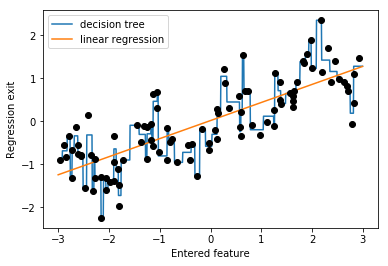

In [30]:
X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line), label='linear regression')

plt.plot(X[:,0], y, 'o', c = 'k')
plt.ylabel("Regression exit")
plt.xlabel("Entered feature")
plt.legend(loc='best')

In [31]:
bins = np.linspace(-3,3,11)
print('features:{}'.format(bins))


features:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [32]:
which_bin = np.digitize(X,bins=bins)
print("\nData points:\n",X[:5])
print("\nData points category:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Data points category:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
print("Array shape X_bined:{}".format(X_binned.shape))

Array shape X_bined:(100, 10)


Text(0.5, 0, 'Entering feature')

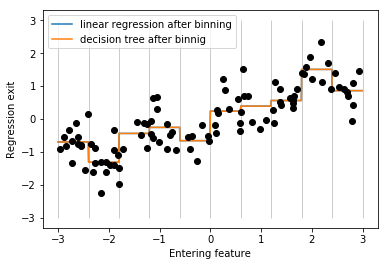

In [41]:
line_binned = encoder.transform(np.digitize(line,bins=bins))
reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='linear regression after binning')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='decision tree after binnig')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression exit")
plt.xlabel("Entering feature")

# POLYNOMIAL FEATURES

In [42]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


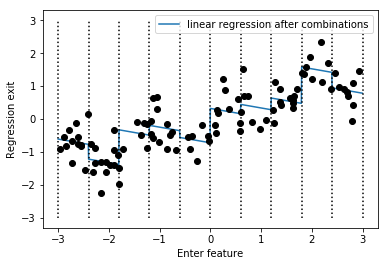

In [43]:
reg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression after combinations')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc='best')
plt.ylabel("Regression exit")
plt.xlabel("Enter feature")
plt.plot(X[:,0], y, 'o', c='k')

In [44]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


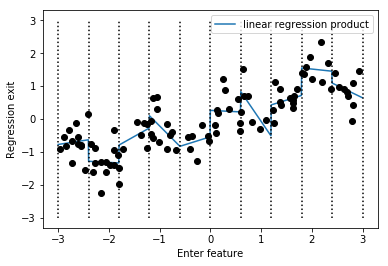

In [46]:
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc='best')
plt.ylabel("Regression exit")
plt.xlabel("Enter feature")
plt.plot(X[:,0], y, 'o', c='k')

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly shape array: {}".format(X_poly.shape))

X_poly shape array: (100, 10)


In [50]:
print("Array element X:\n{}".format(X[:5]))
print("Array element X_poly:\n{}".format(X_poly[:5]))

Array element X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Array element X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [51]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


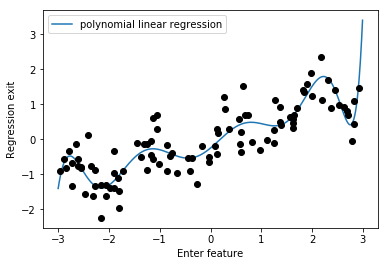

In [52]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.legend(loc='best')
plt.ylabel("Regression exit")
plt.xlabel("Enter feature")
plt.plot(X[:,0], y, 'o', c='k')


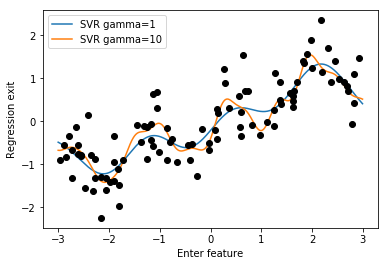

In [53]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma={}'.format(gamma))
plt.legend(loc='best')
plt.ylabel("Regression exit")
plt.xlabel("Enter feature")
plt.plot(X[:,0], y, 'o', c='k')    


In [54]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [55]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split (boston.data, boston.target,
                                                     random_state=0)

In [57]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("train array shape X: {}".format(X_train.shape))
print("train array shape X polynom : {}".format(X_train_poly.shape))

train array shape X: (379, 13)
train array shape X polynom : (379, 105)


In [58]:
print("Polynomila features name:\n{}".format(poly.get_feature_names()))

Polynomila features name:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print("R-square on test set without interaction: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly,y_train)
print("R-square on test set with interaction: {:.3f}".format(ridge.score(X_test_poly, y_test)))




R-square on test set without interaction: 0.621
R-square on test set with interaction: 0.753


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("R-square on test set without interaction: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("R-square on test set without interaction: {:.3f}".format(rf.score(X_test_poly, y_test)))


R-square on test set without interaction: 0.813
R-square on test set without interaction: 0.763


# ONE DIMENSION LINEAR TRANSFORMATION

In [65]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org,w)

In [66]:
print("Frequency of values:\n{}".format(np.bincount(X[:,0])))

Frequency of values:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Values')

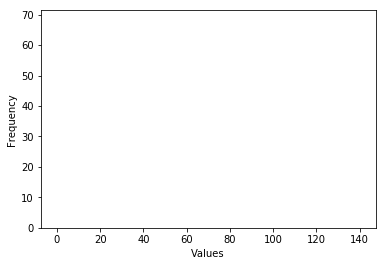

In [70]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("Frequency")
plt.xlabel("Values")

In [72]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("R-square on test set: {:.3f}".format(score))

R-square on test set: 0.622


In [73]:
X_train_log = np.log(X_train +1)
X_test_log = np.log(X_test +1)

Text(0.5, 0, 'Values')

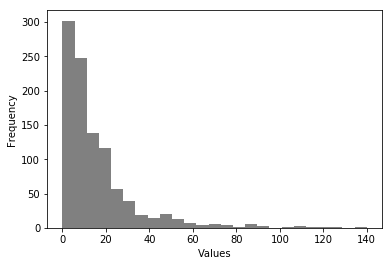

In [75]:
plt.hist(X[:,0], bins=25, color='gray')
plt.ylabel("Frequency")
plt.xlabel("Values")

Text(0.5, 0, 'Values')

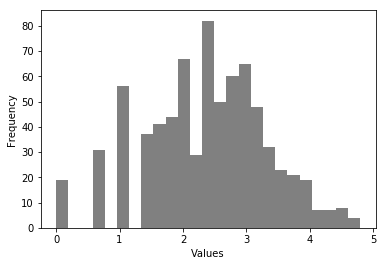

In [77]:
plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.ylabel("Frequency")
plt.xlabel("Values")

In [78]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("R-square on test set: {:.3f}".format(score))

R-square on test set: 0.875


# AUTOMATIC FEATURE SELECTION

### ONE DIMENSION STATISTICS

In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data, noise])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, 
                                                    cancer.target,random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
print("Array shape X_train:{}".format(X_train.shape))
print("Array shape X_train_selected: {}".format(X_train_selected.shape))


Array shape X_train:(284, 80)
Array shape X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Examples index')

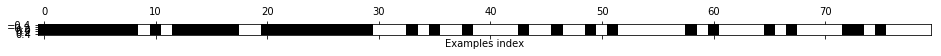

In [83]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Examples index")

In [86]:
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Corrctness with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Corrctness with selected features: {:.3f}".format(lr.score(X_test_selected,y_test)))

Corrctness with all features: 0.930
Corrctness with selected features: 0.940


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### FEATURE SECTED BAsEd ON THE MODEL

In [87]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [88]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("shape of the set X:{}".format(X_train.shape))
print("shape training set X with L1:{}".format(X_train_l1.shape))

shape of the set X:(284, 80)
shape training set X with L1:(284, 40)


Text(0.5, 0, 'index of example')

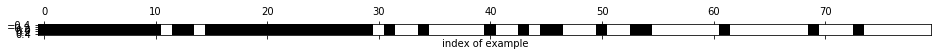

In [90]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("index of example")

In [91]:
X_test_L1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_L1,y_test)
print("Correctness on test set: {:.3f}".format(score))

Correctness on test set: 0.951


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### ITERATIVE FEATURE SELECTION

Text(0.5, 0, 'Index of example')

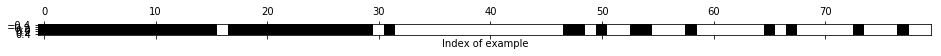

In [93]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Index of example")


In [94]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe,y_test)
print("Correctness on the test set: {:.3f}".format(score))


Correctness on the test set: 0.951


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
print("Correctness on the test set: {:.3f}".format(select.score(X_test,y_test)))

Correctness on the test set: 0.951


In [98]:
def load_citibike():
    data_mine = pd.read_csv('citibike2.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample('3h').sum().fillna(0)
    return data_resampled.one
citibike = load_citibike()

In [99]:
print("data Citi Bike:\n{}".format(citibike.head()))

data Citi Bike:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


/Users/vlad3d/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rent frequency')

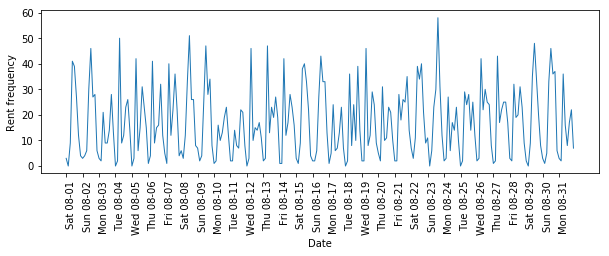

In [101]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel("Rent frequency")

In [113]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [114]:
n_train = 184
def eval_on_features(features,target,regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("R^2 for test set: {:.2f}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8), xticks.strftime("%a %m-%d"), rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test)+n_train),y_test,'-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label = 'train predictions')
    
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label='predict test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel("data")
    plt.ylabel("rent frequency")

R^2 for test set: -0.04


<Figure size 432x288 with 0 Axes>

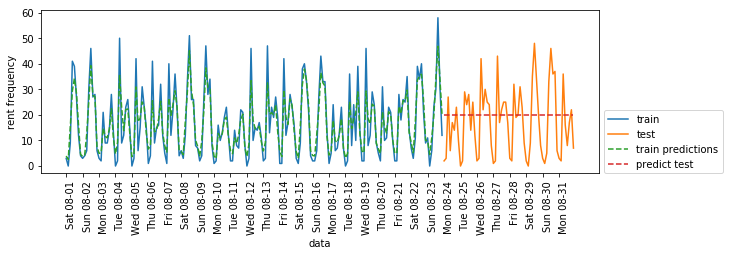

In [115]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X,y,regressor)

R^2 for test set: 0.60


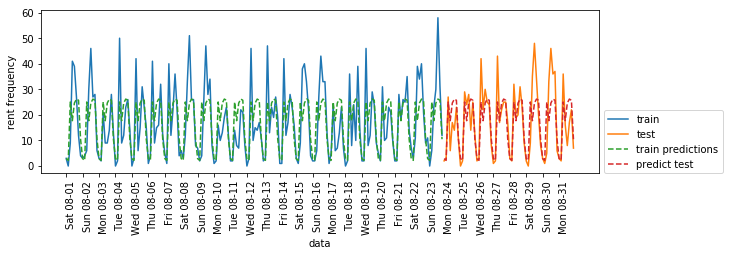

In [117]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

R^2 for test set: 0.84


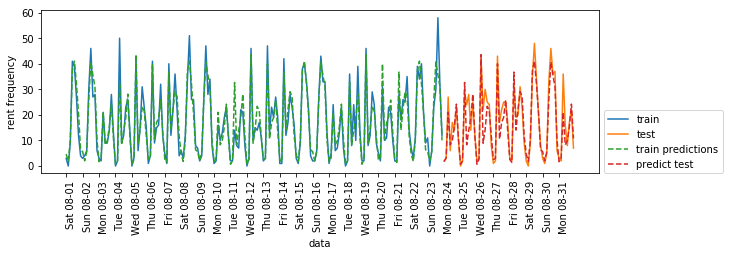

In [119]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1), 
                         citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

R^2 for test set: 0.13


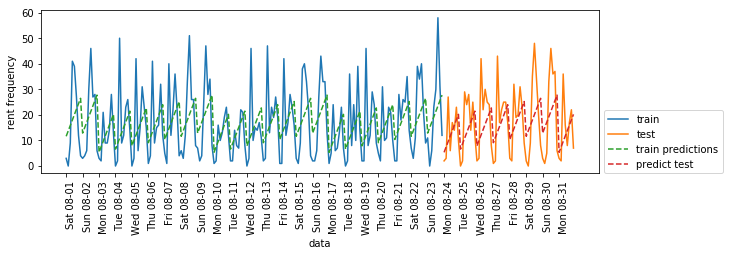

In [120]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

/Users/vlad3d/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


R^2 for test set: 0.62


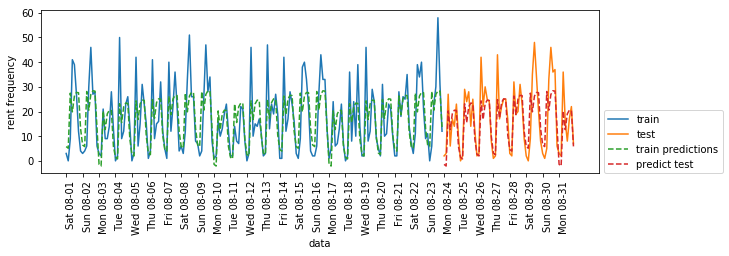

In [121]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

R^2 for test set: 0.85


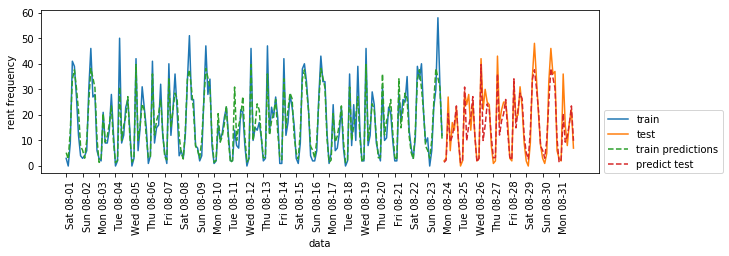

In [122]:
poly_transform = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transform.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [123]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [126]:
features_poly = poly_transform.get_feature_names(features)
feature_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

Text(0, 0.5, 'Feature')

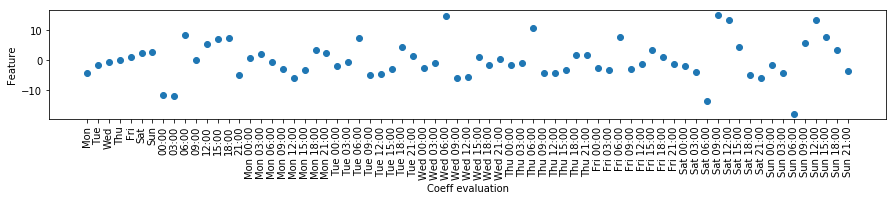

In [127]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)), feature_nonzero, rotation=90)
plt.xlabel("Coeff evaluation")
plt.ylabel("Feature")